In [4]:
%matplotlib inline
import os
import glob
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.utils import compute_class_weight

## Get count for number of images per class after image preprocessing and sorting.

In [265]:
df = pd.read_csv('trainLabels.csv')

# Total training images
print(len(df) - 1)

35125


In [191]:
# Get top values of training labels
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [192]:
# Get bottom values of training labels
df.tail()

,image,level
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0
35125,44349_right,1


In [269]:
print "Number of images for Class 0: ", len(glob.glob("diabetic/processed_images/train/0/*.jpeg"))
print "Number of images for Class 1: ", len(glob.glob("diabetic/processed_images/train/1/*.jpeg"))
print "Number of images for Class 2: ", len(glob.glob("diabetic/processed_images/train/2/*.jpeg"))
print "Number of images for Class 3: ", len(glob.glob("diabetic/processed_images/train/3/*.jpeg"))
print "Number of images for Class 4: ", len(glob.glob("diabetic/processed_images/train/4/*.jpeg"))

Number of images for Class 0:  21978
Number of images for Class 1:  2078
Number of images for Class 2:  4568
Number of images for Class 3:  770
Number of images for Class 4:  606


In [270]:
counts = df.level.value_counts()

# get image frequency by class
frequency = counts / len(df)
print(counts, frequency)

(0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64, 0    0.734783
2    0.150658
1    0.069550
3    0.024853
4    0.020156
Name: level, dtype: float64)


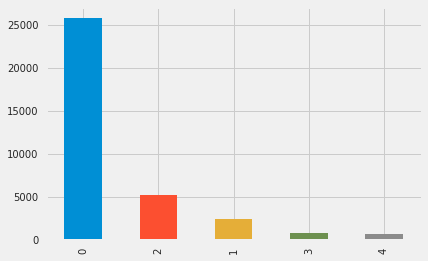

In [173]:
# plot count
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.style.use('fivethirtyeight')
(counts).plot.bar()
plt.show()

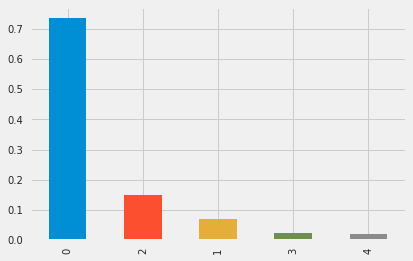

In [174]:
# plot frequency
(frequency).plot.bar()
plt.show()

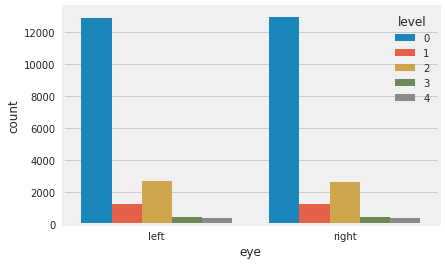

In [256]:
# determine that the # of images for both eyes match
def eyes(side):
    side = side.lower()
    return 'left' if 'left' in side else 'right'

df['eye'] = df['image'].apply(eyes)

sns.countplot(x="eye", hue="level", data=df[['level', 'eye']])
plt.show()

In [261]:
print("Number of images for the right eye: {}".format(len(df[df.eye == 'right'])))
print("Number of images for the left eye: {}".format(len(df[df.eye == 'left'])))

Number of images for the right eye: 17563
Number of images for the left eye: 17563


In [266]:
y = pd.read_csv('trainLabels.csv')
labels = y.level.values
compute_class_weight('balanced',[0, 1, 2, 3, 4], labels)

array([0.27218907, 2.8756447 , 1.32751323, 8.04719359, 9.92259887])

In [5]:
# get sample image
images = glob.glob('sample/*')
image = misc.imread(images[0])
image.shape

(1944, 2592, 3)

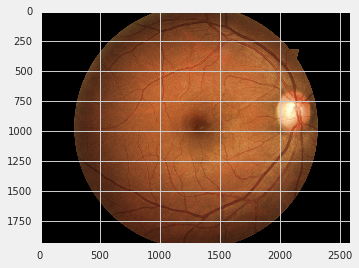

In [180]:
plt.imshow(image)

In [242]:
# get mean of colour channels
def colour_channel_mean(images):
    r, g, b = (0, 0, 0)
    n = float(len(images))
    for image in images:
        image = misc.imread(image)
        r += np.mean(image[:, :, 0])
        g += np.mean(image[:, :, 1])
        b += np.mean(image[:, :, 2])
    return np.array([r / n, g / n, b / n], dtype='uint8')

In [238]:
def get_mean(images):
    total = 0
    n = float(len(images))
    for image in images:
        image = misc.imread(image)
        total += np.mean(image)
    return np.array(total / n, dtype='uint8')

In [243]:
r, g, b = colour_channel_mean(images)
print(r, g, b)

(95, 71, 55)


In [268]:
mean = get_mean(images)
print(mean)

74


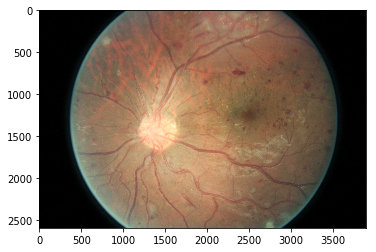

In [6]:
from random import randint
import matplotlib.pyplot as plt
from scipy import misc
image = misc.imread(images[randint(1, 10)])
plt.imshow(image)

## <u>Sample pre-processed image</u>

Below is the pipeline for image preprocessing to enhance the details. The following details were enhanced:


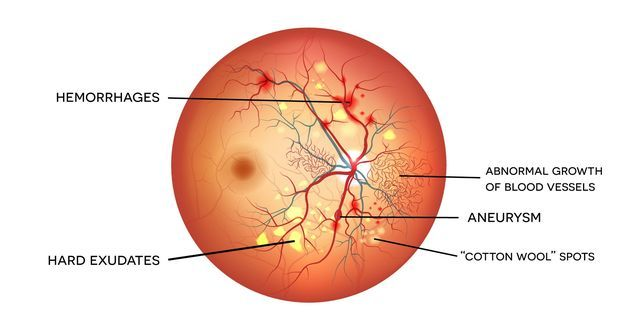

In [220]:
from IPython.display import Image
# credit: https://www.eyeops.com/eye-diseases/diabetic-retinopathy
Image('sample/dr-details.jpg')

Sample code is from the `data_utils.py` file:

```python
def image_process(image_raw):
    grey = ndimage.imread(image_raw, mode='L')
    denoise = ndimage.median_filter(image_raw, 4)
    blurred_f = ndimage.gaussian_filter(grey, 3)
    filter_blurred_f = ndimage.gaussian_filter(denoise, 1)
    alpha = 3.25
    sharpened = image_raw + alpha * (blurred_f - filter_blurred_f)
    cropped_image = crop_black_borders(sharpened, 10)
    resized_cropped_image = imresize(cropped_image, (299, 299, 3), interp="bicubic")
    return resized_cropped_image
```

## Sample image in preprocessing pipeline

A sample image with the end result after undergoing:

1. denoising (Mean filter) 
2. sharpening (Gaussian filter)
3. cropping
4. resizing

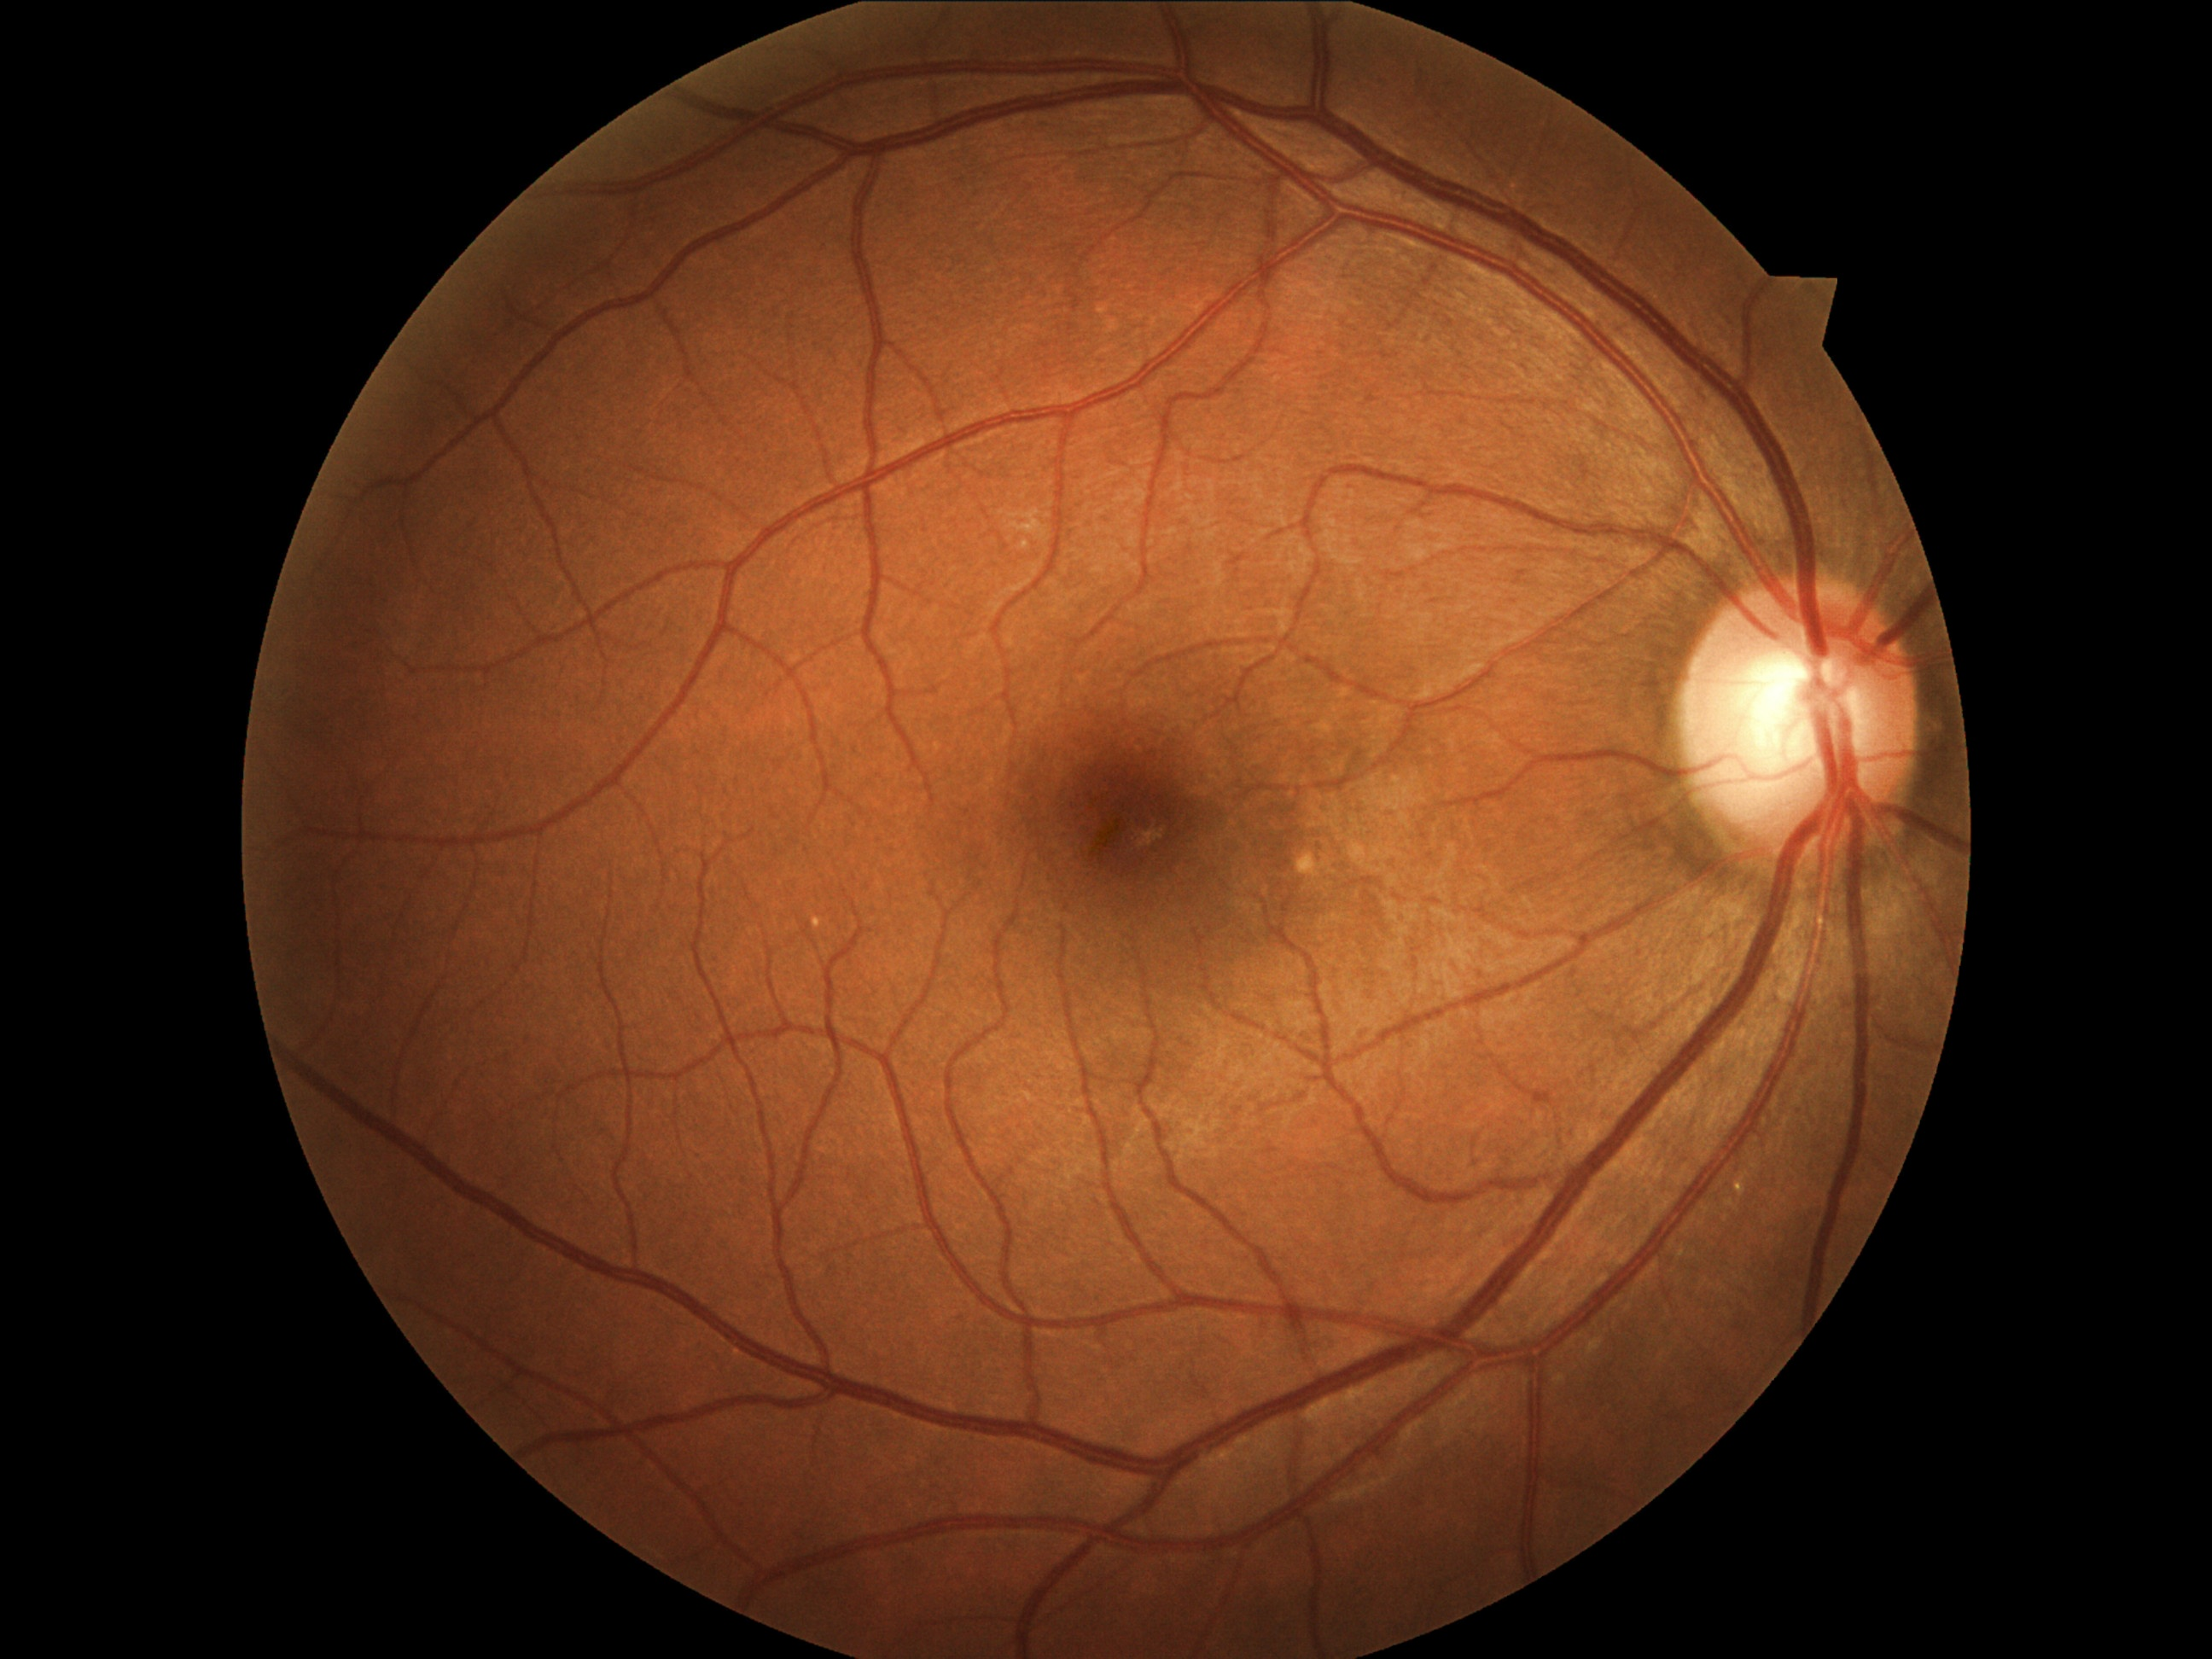

In [222]:
Image('sample/13_right.jpeg')

## Processed Image

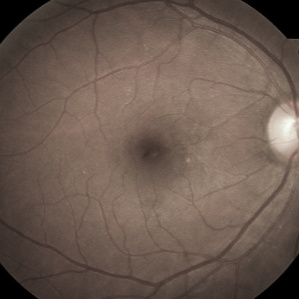

In [221]:
Image('sample/processed.jpeg')